### Importing all Necessary Libraries

In [15]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.datasets import boston_housing
from keras.datasets import reuters
from keras.utils import to_categorical

### Importing all Classes

In [16]:

from imdb import Imdb
from boston_housing import BostonHousing
from reuters import Reuters

### IMDB Model

In [17]:
imdb_model = Imdb()
imdb_model.load_data()
imdb_model.build_model()
imdb_history = imdb_model.train_model()

Epoch 1/30
40/40 [==============================] - 2s 32ms/step - loss: 0.4830 - accuracy: 0.7945 - val_loss: 0.3643 - val_accuracy: 0.8634
Epoch 2/30
40/40 [==============================] - 0s 10ms/step - loss: 0.2872 - accuracy: 0.9007 - val_loss: 0.2879 - val_accuracy: 0.8912
Epoch 3/30
40/40 [==============================] - 0s 9ms/step - loss: 0.2204 - accuracy: 0.9241 - val_loss: 0.2807 - val_accuracy: 0.8904
Epoch 4/30
40/40 [==============================] - 0s 9ms/step - loss: 0.1821 - accuracy: 0.9366 - val_loss: 0.2737 - val_accuracy: 0.8908
Epoch 5/30
40/40 [==============================] - 0s 9ms/step - loss: 0.1542 - accuracy: 0.9467 - val_loss: 0.2790 - val_accuracy: 0.8902
Epoch 6/30
40/40 [==============================] - 0s 9ms/step - loss: 0.1372 - accuracy: 0.9503 - val_loss: 0.3064 - val_accuracy: 0.8846
Epoch 7/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1180 - accuracy: 0.9602 - val_loss: 0.3176 - val_accuracy: 0.8850
Epoch 8/30
40/40 [

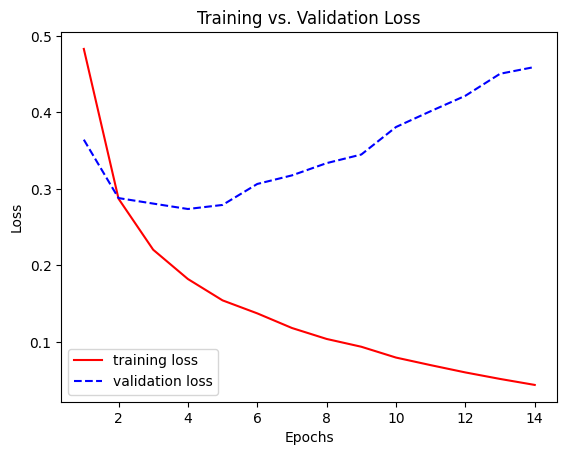

In [18]:
imdb_model.plot_training_history(imdb_history)

In [19]:
imdb_model.save_model("imdb_model.h5")

In [20]:
# Testing IMDB model with string input
input_imdb = "Matrix is a great Movie"

# Tokenizing using the same tokenizer used in the Imdb class
token = tf.keras.datasets.imdb.get_word_index()
words = input_imdb.lower().split()
word_indices = [token[word] if word in token and token[word] < imdb_model.NUM_WORDS else 0 for word in words]

# Vectorizing sequences
new_vector = imdb_model.vectorize_sequences([word_indices])

# Testing the model
sample_input_imdb_result = imdb_model.model.predict(new_vector)
print("Imdb Model Prediction for Sample Input:", sample_input_imdb_result)


1/1 [==============================] - 0s 41ms/step
Imdb Model Prediction for Sample Input: [[0.6047949]]


### Boston

In [21]:
boston_model = BostonHousing()
boston_model.load_and_normalize_data()
boston_model.build_model()
boston_history = boston_model.train_model()

Epoch 1/200
11/11 [==============================] - 1s 12ms/step - loss: 531.3329 - mae: 21.1918 - val_loss: 572.5865 - val_mae: 22.1580
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 481.9191 - mae: 20.0401 - val_loss: 513.9294 - val_mae: 20.8590
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 419.9040 - mae: 18.5600 - val_loss: 438.9356 - val_mae: 19.0467
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 341.4930 - mae: 16.4671 - val_loss: 344.4998 - val_mae: 16.5126
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 251.4645 - mae: 13.6548 - val_loss: 244.4181 - val_mae: 13.2026
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 168.3236 - mae: 10.6152 - val_loss: 164.1391 - val_mae: 10.0987
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 112.1359 - mae: 8.4341 - val_loss: 113.2122 - val_mae: 8.1882
Epoch 8/200
11/11 [=======================

### Training Loss Vs Validation Loss of Boston Model

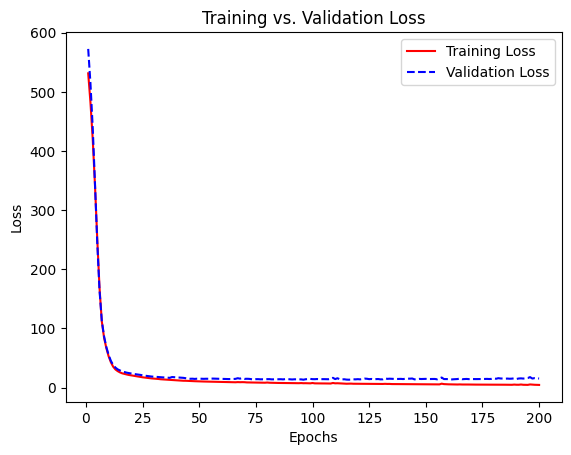

In [22]:

boston_model.plot_training_history(boston_history)

### Reuters

In [23]:

sample_input_boston = np.array([0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14])
sample_input_boston = sample_input_boston.reshape(1, -1)  # Reshape for prediction
sample_input_boston_result = boston_model.model.predict(sample_input_boston)
print("BostonHousing Model Prediction for Sample Input:", sample_input_boston_result)

1/1 [==============================] - 0s 52ms/step
BostonHousing Model Prediction for Sample Input: [[2075.3413]]


In [24]:
# Initializing the Reuters class
reuters_model = Reuters()
reuters_model.load_data()
reuters_model.build_model()
reuters_history = reuters_model.train_model()

Epoch 1/20
15/15 [==============================] - 1s 26ms/step - loss: 2.7025 - accuracy: 0.4352 - val_loss: 1.8890 - val_accuracy: 0.5893
Epoch 2/20
15/15 [==============================] - 0s 13ms/step - loss: 1.6183 - accuracy: 0.6408 - val_loss: 1.4737 - val_accuracy: 0.6672
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 1.2649 - accuracy: 0.7190 - val_loss: 1.3809 - val_accuracy: 0.6745
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0567 - accuracy: 0.7683 - val_loss: 1.2010 - val_accuracy: 0.7340
Epoch 5/20
15/15 [==============================] - 0s 14ms/step - loss: 0.8865 - accuracy: 0.8120 - val_loss: 1.1080 - val_accuracy: 0.7663
Epoch 6/20
15/15 [==============================] - 0s 13ms/step - loss: 0.7492 - accuracy: 0.8429 - val_loss: 1.0805 - val_accuracy: 0.7652
Epoch 7/20
15/15 [==============================] - 0s 14ms/step - loss: 0.6341 - accuracy: 0.8665 - val_loss: 1.0459 - val_accuracy: 0.7718
Epoch 8/20
15

In [25]:
# Evaluate Reuters model
evaluate_reuters = reuters_model.evaluate_model()
print("Reuters Model Evaluation:", evaluate_reuters)

71/71 [==============================] - 0s 2ms/step - loss: 1.0657 - accuracy: 0.7769
Reuters Model Evaluation: [1.065659761428833, 0.7769367694854736]


In [26]:
# Test Reuters model with a string input
input_reuters = "Matrix review has been extracted from the movie article"

# Tokenizing using the same tokenizer used in Reuters class
token = reuters_model.x_train
words = input_reuters.lower().split()
word_indices = [token[word] if word in token and token[word] < reuters_model.NUM_WORDS else 0 for word in words]

# Vectorizing sequences
new_vector = reuters_model.vectorize_sequences([word_indices])

# Testing the model
reuters_result = reuters_model.model.predict(new_vector)
print("Reuters Model Prediction for Sample Input:", reuters_result)


1/1 [==============================] - 0s 44ms/step
Reuters Model Prediction for Sample Input: [[0.01828225 0.02562585 0.01587938 0.04845876 0.04075969 0.0180025
  0.01883409 0.01912404 0.02087814 0.01998713 0.02639915 0.02465591
  0.0221401  0.01946133 0.02048502 0.0210603  0.02625523 0.01915897
  0.01895961 0.02515069 0.02617758 0.0206693  0.01830031 0.02080198
  0.01876396 0.01775152 0.01678384 0.02411541 0.02068059 0.02105885
  0.02302004 0.02301399 0.01881015 0.01764106 0.0196546  0.02098637
  0.01951391 0.01891419 0.02095205 0.02236112 0.02242716 0.01738284
  0.01941204 0.02120656 0.01836824 0.02167425]]


C:\Users\13132\AppData\Local\Temp\ipykernel_10940\959003445.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  word_indices = [token[word] if word in token and token[word] < reuters_model.NUM_WORDS else 0 for word in words]
